In [1]:
import pandas as pd
import numpy as np

In [2]:
loc_lbl = r"D:\FacundoTorraca\Documents\TP2_Machine_Learning\Labels"

In [3]:
loc_ftr = r"D:\FacundoTorraca\Documents\TP2_Machine_Learning\Features\ftr_ins"

In [4]:
ins_lb = pd.read_csv( loc_lbl + "\\ins_lb.csv", dtype = {"obs_18_20":"bool", "obs_21_23":"bool", "obs_24_26":"bool"} )

### Filtro de manera que tenga los datos necesarios

In [1532]:
rh_18_20 = pd.read_csv( "D:\FacundoTorraca\Documents\TP2_Machine_Learning\Training Sets\ins_18_20.csv" ); rh_18_20 = rh_18_20["ref_hash"].drop_duplicates().tolist()
rh_21_23 = pd.read_csv( "D:\FacundoTorraca\Documents\TP2_Machine_Learning\Training Sets\ins_21_23.csv" ); rh_21_23 = rh_21_23["ref_hash"].drop_duplicates().tolist()

In [2195]:
set_trn = ins_lb.loc[ ins_lb["ref_hash"].isin( rh_18_20 ), ["ref_hash", "21_23_sc"] ]
set_tst = ins_lb.loc[ ins_lb["ref_hash"].isin( rh_21_23 ), ["ref_hash", "24_26_sc"] ]

t_lim = 259200; max_t = 400
set_trn_loc = pd.concat( [ set_trn.loc[ set_trn["21_23_sc"] < t_lim ], set_trn.loc[ set_trn["21_23_sc"] == t_lim ].reset_index( drop = True ).loc[: max_t] ], axis = 0 ).sample(frac=1).reset_index(drop=True)
set_tst_loc = pd.concat( [ set_tst.loc[ set_tst["24_26_sc"] < t_lim ], set_tst.loc[ set_tst["24_26_sc"] == t_lim ].reset_index( drop = True ).loc[: max_t] ], axis = 0 ).sample(frac=1).reset_index(drop=True)

In [2196]:
len( set_trn_loc )

4249

### Creamos los Train/Test

In [2197]:
Z = set_tst[ ["ref_hash"] ] #Datos test
W = set_tst[ ["ref_hash","24_26_sc"] ] #Label test

In [2198]:
X = set_trn[ ["ref_hash"] ] #Datos train
Y = set_trn[ ["ref_hash","21_23_sc"] ] #Label train

In [2199]:
Z_loc = set_tst_loc[ ["ref_hash"] ] #Datos test reducido
W_loc = set_tst_loc[ ["ref_hash","24_26_sc"] ] #Label test reducido

In [2200]:
X_loc = set_trn_loc[ ["ref_hash"] ] #Datos train reducido
Y_loc = set_trn_loc[ ["ref_hash","21_23_sc"] ] #Label train reducido

# <span style="color:orange">  Preparo los datos para predecir </span>
Con los datos 21-23 predecimos "24-26_sc"

In [3383]:
Z_var = Z_loc
W_var = W_loc

### Agregamos los features 

In [3384]:
#ftr_01_Z = pd.read_csv( loc_ftr + "\\sin_hour_21_23.csv" ); Z_var = Z_var.merge( ftr_01_Z, how = "inner", on = "ref_hash" ) 
#ftr_02_Z = pd.read_csv( loc_ftr + "\\cant_ins_21_23.csv" ); Z_var = Z_var.merge( ftr_02_Z, how = "inner", on = "ref_hash" ) 
#ftr_03_Z = pd.read_csv( loc_ftr + "\\cins_imp_21_23.csv" ); Z_var = Z_var.merge( ftr_03_Z, how = "inner", on = "ref_hash" ) 
#ftr_04_Z = pd.read_csv( loc_ftr + "\\cant_evt_21_23.csv" ); Z_var = Z_var.merge( ftr_04_Z, how = "inner", on = "ref_hash" )
ftr_05_Z = pd.read_csv( loc_ftr + "\\cant_auc_21_23.csv" ); Z_var = Z_var.merge( ftr_05_Z, how = "inner", on = "ref_hash" ) #FeaturesWorking
#ftr_06_Z = pd.read_csv( loc_ftr + "\\wifi_ins_21_23.csv" ); Z_var = Z_var.merge( ftr_06_Z, how = "inner", on = "ref_hash" )
ftr_07_Z = pd.read_csv( loc_ftr + "\\main_app_21_23.csv" ); Z_var = Z_var.merge( ftr_07_Z, how = "inner", on = "ref_hash" ) #FeaturesWorking 
#ftr_08_Z = pd.read_csv( loc_ftr + "\\type_ins_21_23.csv" ); Z_var = Z_var.merge( ftr_08_Z, how = "inner", on = "ref_hash" ) 
#ftr_09_Z = pd.read_csv( loc_ftr + "\\ref_type_21_23.csv" ); Z_var = Z_var.merge( ftr_09_Z, how = "inner", on = "ref_hash" ) 
#ftr_10_Z = pd.read_csv( loc_ftr + "\\ip_encod_21_23.csv" ); Z_var = Z_var.merge( ftr_10_Z, how = "inner", on = "ref_hash" ) 
ftr_11_Z = pd.read_csv( loc_ftr + "\\frst_ins_21_23.csv" ); Z_var = Z_var.merge( ftr_11_Z, how = "inner", on = "ref_hash" ) #FeaturesWorking
#ftr_12_Z = pd.read_csv( loc_ftr + "\\cevt_atr_21_23.csv" ); Z_var = Z_var.merge( ftr_12_Z, how = "inner", on = "ref_hash" )
#ftr_13_Z = pd.read_csv( loc_ftr + "\\kind_evt_21_23.csv" ); Z_var = Z_var.merge( ftr_13_Z, how = "inner", on = "ref_hash" )
ftr_14_Z = pd.read_csv( loc_ftr + "\\frst_auc_21_23.csv" ); Z_var = Z_var.merge( ftr_14_Z, how = "inner", on = "ref_hash" ) #FeaturesWorking

#ftr_15_Z = pd.read_csv( loc_ftr + "\\ins_ngoh_21_23.csv" ); Z_var = Z_var.merge( ftr_15_Z, how = "inner", on = "ref_hash" )
#ftr_16_Z = pd.read_csv( loc_ftr + "\\ins_mroh_21_23.csv" ); Z_var = Z_var.merge( ftr_16_Z, how = "inner", on = "ref_hash" )
#ftr_17_Z = pd.read_csv( loc_ftr + "\\ins_afoh_21_23.csv" ); Z_var = Z_var.merge( ftr_17_Z, how = "inner", on = "ref_hash" )
#ftr_18_Z = pd.read_csv( loc_ftr + "\\ins_mdoh_21_23.csv" ); Z_var = Z_var.merge( ftr_18_Z, how = "inner", on = "ref_hash" )

#ftr_19_Z = pd.read_csv( loc_ftr + "\\auc_ngme_21_23.csv" ); Z_var = Z_var.merge( ftr_19_Z, how = "inner", on = "ref_hash" )
#ftr_20_Z = pd.read_csv( loc_ftr + "\\auc_mrme_21_23.csv" ); Z_var = Z_var.merge( ftr_20_Z, how = "inner", on = "ref_hash" )
#ftr_21_Z = pd.read_csv( loc_ftr + "\\auc_afme_21_23.csv" ); Z_var = Z_var.merge( ftr_21_Z, how = "inner", on = "ref_hash" )
#ftr_22_Z = pd.read_csv( loc_ftr + "\\auc_mdme_21_23.csv" ); Z_var = Z_var.merge( ftr_22_Z, how = "inner", on = "ref_hash" )

#ftr_23_Z = pd.read_csv( loc_ftr + "\\clk_ngme_21_23.csv" ); Z_var = Z_var.merge( ftr_23_Z, how = "inner", on = "ref_hash" )
#ftr_24_Z = pd.read_csv( loc_ftr + "\\clk_mrme_21_23.csv" ); Z_var = Z_var.merge( ftr_24_Z, how = "inner", on = "ref_hash" )
#ftr_25_Z = pd.read_csv( loc_ftr + "\\clk_afme_21_23.csv" ); Z_var = Z_var.merge( ftr_25_Z, how = "inner", on = "ref_hash" )
#ftr_26_Z = pd.read_csv( loc_ftr + "\\clk_mdme_21_23.csv" ); Z_var = Z_var.merge( ftr_26_Z, how = "inner", on = "ref_hash" )

#ftr_27_Z = pd.read_csv( loc_ftr + "\\evt_ngme_21_23.csv" ); Z_var = Z_var.merge( ftr_23_Z, how = "inner", on = "ref_hash" )
#ftr_28_Z = pd.read_csv( loc_ftr + "\\evt_mrme_21_23.csv" ); Z_var = Z_var.merge( ftr_24_Z, how = "inner", on = "ref_hash" )
#ftr_29_Z = pd.read_csv( loc_ftr + "\\evt_afme_21_23.csv" ); Z_var = Z_var.merge( ftr_25_Z, how = "inner", on = "ref_hash" )
#ftr_30_Z = pd.read_csv( loc_ftr + "\\evt_mdme_21_23.csv" ); Z_var = Z_var.merge( ftr_26_Z, how = "inner", on = "ref_hash" )

#ftr_31_Z = pd.read_csv( loc_ftr + "\\frst_evt_21_23.csv" ); Z_var = Z_var.merge( ftr_27_Z, how = "inner", on = "ref_hash" )
#ftr_32_Z = pd.read_csv( loc_ftr + "\\hr_f_evt_21_23.csv" ); Z_var = Z_var.merge( ftr_28_Z, how = "inner", on = "ref_hash" )
#ftr_33_Z = pd.read_csv( loc_ftr + "\\last_evt_21_23.csv" ); Z_var = Z_var.merge( ftr_29_Z, how = "inner", on = "ref_hash" )
#ftr_34_Z = pd.read_csv( loc_ftr + "\\m1oh_auc_21_23.csv" ); Z_var = Z_var.merge( ftr_30_Z, how = "inner", on = "ref_hash" )

ftr_35_Z = pd.read_csv( loc_ftr + "\\ins_dsua_21_23.csv" ); Z_var = Z_var.merge( ftr_35_Z, how = "inner", on = "ref_hash" ) #FeaturesWorking
ftr_36_Z = pd.read_csv( loc_ftr + "\\frst_evt_21_23.csv" ); Z_var = Z_var.merge( ftr_36_Z, how = "inner", on = "ref_hash" ) #FeaturesWorking
#ftr_37_Z = pd.read_csv( loc_ftr + "\\atbt_ins_21_23.csv" ); Z_var = Z_var.merge( ftr_37_Z, how = "inner", on = "ref_hash" )
#ftr_38_Z = pd.read_csv( loc_ftr + "\\cevt_atr_21_23.csv" ); Z_var = Z_var.merge( ftr_38_Z, how = "inner", on = "ref_hash" )
#ftr_39_Z = pd.read_csv( loc_ftr + "\\mapp_evt_21_23.csv" ); Z_var = Z_var.merge( ftr_39_Z, how = "inner", on = "ref_hash" )
#ftr_40_Z = pd.read_csv( loc_ftr + "\\wifi_evt_21_23.csv" ); Z_var = Z_var.merge( ftr_40_Z, how = "inner", on = "ref_hash" )
#ftr_41_Z = pd.read_csv( loc_ftr + "\\frst_clk_21_23.csv" ); Z_var = Z_var.merge( ftr_41_Z, how = "inner", on = "ref_hash" )

# <span style="color:orange">  Preparo los datos para entrenar </span>

Con los datos 18-20 + "21-23_sc" entrenamos

In [3399]:
Y_var = Y_loc
X_var = X_loc

### Agregamos los features

In [3400]:
#ftr_01_X = pd.read_csv( loc_ftr + "\\sin_hour_18_20.csv" ); X_var = X_var.merge( ftr_01_X, how = "inner", on = "ref_hash" ) 
#ftr_02_X = pd.read_csv( loc_ftr + "\\cant_ins_18_20.csv" ); X_var = X_var.merge( ftr_02_X, how = "inner", on = "ref_hash" ) 
#ftr_03_X = pd.read_csv( loc_ftr + "\\cins_imp_18_20.csv" ); X_var = X_var.merge( ftr_03_X, how = "inner", on = "ref_hash" ) 
#ftr_04_X = pd.read_csv( loc_ftr + "\\cant_evt_18_20.csv" ); X_var = X_var.merge( ftr_04_X, how = "inner", on = "ref_hash" )
ftr_05_X = pd.read_csv( loc_ftr + "\\cant_auc_18_20.csv" ); X_var = X_var.merge( ftr_05_X, how = "inner", on = "ref_hash" ) #FeaturesWorking
#ftr_06_X = pd.read_csv( loc_ftr + "\\wifi_ins_18_20.csv" ); X_var = X_var.merge( ftr_06_X, how = "inner", on = "ref_hash" )
ftr_07_X = pd.read_csv( loc_ftr + "\\main_app_18_20.csv" ); X_var = X_var.merge( ftr_07_X, how = "inner", on = "ref_hash" ) #FeaturesWorking
#ftr_08_X = pd.read_csv( loc_ftr + "\\type_ins_18_20.csv" ); X_var = X_var.merge( ftr_08_X, how = "inner", on = "ref_hash" )
#ftr_09_X = pd.read_csv( loc_ftr + "\\ref_type_18_20.csv" ); X_var = X_var.merge( ftr_09_X, how = "inner", on = "ref_hash" ) 
#ftr_10_X = pd.read_csv( loc_ftr + "\\ip_encod_18_20.csv" ); X_var = X_var.merge( ftr_10_X, how = "inner", on = "ref_hash" ) 
ftr_11_X = pd.read_csv( loc_ftr + "\\frst_ins_18_20.csv" ); X_var = X_var.merge( ftr_11_X, how = "inner", on = "ref_hash" ) #FeaturesWorking
#ftr_12_X = pd.read_csv( loc_ftr + "\\cevt_atr_18_20.csv" ); X_var = X_var.merge( ftr_12_X, how = "inner", on = "ref_hash" ) 
#ftr_13_X = pd.read_csv( loc_ftr + "\\kind_evt_18_20.csv" ); X_var = X_var.merge( ftr_13_X, how = "inner", on = "ref_hash" )
ftr_14_X = pd.read_csv( loc_ftr + "\\frst_auc_18_20.csv" ); X_var = X_var.merge( ftr_14_X, how = "inner", on = "ref_hash" ) #FeaturesWorking

#ftr_15_X = pd.read_csv( loc_ftr + "\\ins_ngoh_18_20.csv" ); X_var = X_var.merge( ftr_15_X, how = "inner", on = "ref_hash" )
#ftr_16_X = pd.read_csv( loc_ftr + "\\ins_mroh_18_20.csv" ); X_var = X_var.merge( ftr_16_X, how = "inner", on = "ref_hash" )
#ftr_17_X = pd.read_csv( loc_ftr + "\\ins_afoh_18_20.csv" ); X_var = X_var.merge( ftr_17_X, how = "inner", on = "ref_hash" )
#ftr_18_X = pd.read_csv( loc_ftr + "\\ins_mdoh_18_20.csv" ); X_var = X_var.merge( ftr_18_X, how = "inner", on = "ref_hash" )

#ftr_19_X = pd.read_csv( loc_ftr + "\\auc_ngme_18_20.csv" ); X_var = X_var.merge( ftr_19_X, how = "inner", on = "ref_hash" )
#ftr_20_X = pd.read_csv( loc_ftr + "\\auc_mrme_18_20.csv" ); X_var = X_var.merge( ftr_20_X, how = "inner", on = "ref_hash" )
#ftr_21_X = pd.read_csv( loc_ftr + "\\auc_afme_18_20.csv" ); X_var = X_var.merge( ftr_21_X, how = "inner", on = "ref_hash" )
#ftr_22_X = pd.read_csv( loc_ftr + "\\auc_mdme_18_20.csv" ); X_var = X_var.merge( ftr_22_X, how = "inner", on = "ref_hash" )

#ftr_23_X = pd.read_csv( loc_ftr + "\\clk_ngme_18_20.csv" ); X_var = X_var.merge( ftr_23_X, how = "inner", on = "ref_hash" )
#ftr_24_X = pd.read_csv( loc_ftr + "\\clk_mrme_18_20.csv" ); X_var = X_var.merge( ftr_24_X, how = "inner", on = "ref_hash" )
#ftr_25_X = pd.read_csv( loc_ftr + "\\clk_afme_18_20.csv" ); X_var = X_var.merge( ftr_25_X, how = "inner", on = "ref_hash" )
#ftr_26_X = pd.read_csv( loc_ftr + "\\clk_mdme_18_20.csv" ); X_var = X_var.merge( ftr_26_X, how = "inner", on = "ref_hash" )

#ftr_27_X = pd.read_csv( loc_ftr + "\\evt_ngme_18_20.csv" ); X_var = X_var.merge( ftr_23_X, how = "inner", on = "ref_hash" )
#ftr_28_X = pd.read_csv( loc_ftr + "\\evt_mrme_18_20.csv" ); X_var = X_var.merge( ftr_24_X, how = "inner", on = "ref_hash" )
#ftr_29_X = pd.read_csv( loc_ftr + "\\evt_afme_18_20.csv" ); X_var = X_var.merge( ftr_25_X, how = "inner", on = "ref_hash" )
#ftr_30_X = pd.read_csv( loc_ftr + "\\evt_mdme_18_20.csv" ); X_var = X_var.merge( ftr_26_X, how = "inner", on = "ref_hash" )

#ftr_31_X = pd.read_csv( loc_ftr + "\\frst_evt_18_20.csv" ); X_var = X_var.merge( ftr_27_X, how = "inner", on = "ref_hash" )
#ftr_32_X = pd.read_csv( loc_ftr + "\\hr_f_evt_18_20.csv" ); X_var = X_var.merge( ftr_28_X, how = "inner", on = "ref_hash" )
#ftr_33_X = pd.read_csv( loc_ftr + "\\last_evt_18_20.csv" ); X_var = X_var.merge( ftr_29_X, how = "inner", on = "ref_hash" )
#ftr_34_X = pd.read_csv( loc_ftr + "\\m1oh_auc_18_20.csv" ); X_var = X_var.merge( ftr_30_X, how = "inner", on = "ref_hash" )

ftr_35_X = pd.read_csv( loc_ftr + "\\ins_dsua_18_20.csv" ); X_var = X_var.merge( ftr_35_X, how = "inner", on = "ref_hash" ) #FeaturesWorking
ftr_36_X = pd.read_csv( loc_ftr + "\\frst_evt_18_20.csv" ); X_var = X_var.merge( ftr_36_X, how = "inner", on = "ref_hash" ) #FeaturesWorking
#ftr_37_X = pd.read_csv( loc_ftr + "\\atbt_ins_18_20.csv" ); X_var = X_var.merge( ftr_37_X, how = "inner", on = "ref_hash" )
#ftr_38_X = pd.read_csv( loc_ftr + "\\cevt_atr_18_20.csv" ); X_var = X_var.merge( ftr_38_X, how = "inner", on = "ref_hash" )
#ftr_39_X = pd.read_csv( loc_ftr + "\\mapp_evt_18_20.csv" ); X_var = X_var.merge( ftr_39_X, how = "inner", on = "ref_hash" )
#ftr_40_X = pd.read_csv( loc_ftr + "\\wifi_evt_18_20.csv" ); X_var = X_var.merge( ftr_40_X, how = "inner", on = "ref_hash" )
#ftr_41_X = pd.read_csv( loc_ftr + "\\frst_clk_18_20.csv" ); X_var = X_var.merge( ftr_41_X, how = "inner", on = "ref_hash" )

## Reacomodamos los SC para que queden junto a su ref_hash correspondiente

In [3401]:
X_var = X_var.merge( Y_var, how = "inner", on = "ref_hash" ); Y_var = X_var[ ["21_23_sc"] ]
Z_var = Z_var.merge( W_var, how = "inner", on = "ref_hash" ); W_var = Z_var[ ["24_26_sc"] ]

KeyError: 'ref_hash'

## Dropeamos algunos valores maximos (No convirtieron)

Los "loc" es el DataFrame de entrenamiento recortado con 200 valores maximos (No conversion) y 3848 valores que convirtieron

In [ ]:
X_var = X_var.drop( ["ref_hash", "21_23_sc"], axis = 1 )
Z_var = Z_var.drop( ["ref_hash", "24_26_sc"], axis = 1 )

# Prediccion con <span style="color:green"> *XGBoost*</span> 

In [3389]:
import xgboost as xgb
import graphviz as gr 

In [3390]:
prm = {"booster":"gbtree",
       "objective":"reg:linear",
       "colsample_bytree" : 0.3, 
       "learning_rate" : 0.101,
       "max_depth": 3,
       "n_estimators" : 70,
       "eval_metric": "rmse",
       "num_parallel_tree":20,
      }

mdl = xgb.XGBRegressor( **prm )

In [3391]:
fit = mdl.fit( X_var,Y_var )

In [3392]:
prd = fit.predict( Z_var )

## Calculamos el RMSE

In [3393]:
from sklearn.metrics import mean_squared_error

In [3394]:
rmse = np.sqrt( mean_squared_error(W_var, prd) )
print("RMSE: %f" % (rmse) )

RMSE: 83482.802933


In [3337]:
record_000 = 77721.181949 #max depth = 2, n_stimators = 70, learning_rate = 0.080, num_parallel_tree = 35
record_400 = 83482.802933 #max depth = 3, n_stimators = 70, learning_rate = 0.101, num_parallel_tree = 20

### Probamos features

In [3398]:
from numpy import sort
from sklearn.feature_selection import SelectFromModel

thresholds = sort(fit.feature_importances_)
i = 0; pred = []; mod_sel = [];
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(fit, threshold=thresh, prefit=True)
    select_X = selection.transform(X_var)
    # train model
    selection_model = xgb.XGBRegressor( **prm )
    mod_sel.append( selection_model.fit(select_X, Y_var) )
    # eval model
    select_Z = selection.transform(Z_var)
    pred.append( selection_model.predict(select_Z) )
    rmse = np.sqrt( mean_squared_error(pred[i], W_var) )
    print("Thresh=%.3f, n=%d, RMSE:%f, model=%d" % (thresh, select_X.shape[1], rmse, i) )
    i = i + 1


Thresh=0.106, n=6, RMSE:83482.802933, model=0
Thresh=0.114, n=5, RMSE:83470.642179, model=1
Thresh=0.116, n=4, RMSE:83388.845268, model=2
Thresh=0.154, n=3, RMSE:83445.703339, model=3
Thresh=0.238, n=2, RMSE:83634.950897, model=4
Thresh=0.272, n=1, RMSE:83832.598568, model=5


## Tunning de HyperParameters

In [1964]:
from sklearn.model_selection import RandomizedSearchCV

In [1965]:
from sklearn.metrics import mean_squared_error, make_scorer
#greater_is_better = False -> Transformar score_function en loss_function
mse = make_scorer( mean_squared_error, greater_is_better = False )

In [ ]:
reg = xgb.XGBRegressor()

tune_prms = {'max_depth': [1,2,3,4],
             'learning_rate': [0.01, 0.05, 0.1,0.15],
             'n_estimators': [80,120,200,250]
            }

grid = RandomizedSearchCV( estimator = mdl, param_distributions = tune_prms, cv = 10, n_jobs = 1, scoring = mse, n_iter = 20 ) 
grid.fit( X, Y )    

In [ ]:
# Results from Grid Search
print("==========================================================")
print("||            Results from Grid Search                  ||")
print("==========================================================")    
    
print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
print("\n The best score across ALL searched params:\n", grid.best_score_)
print("\n The best parameters across ALL searched params:\n", grid.best_params_)

## Graficamos el Arbol

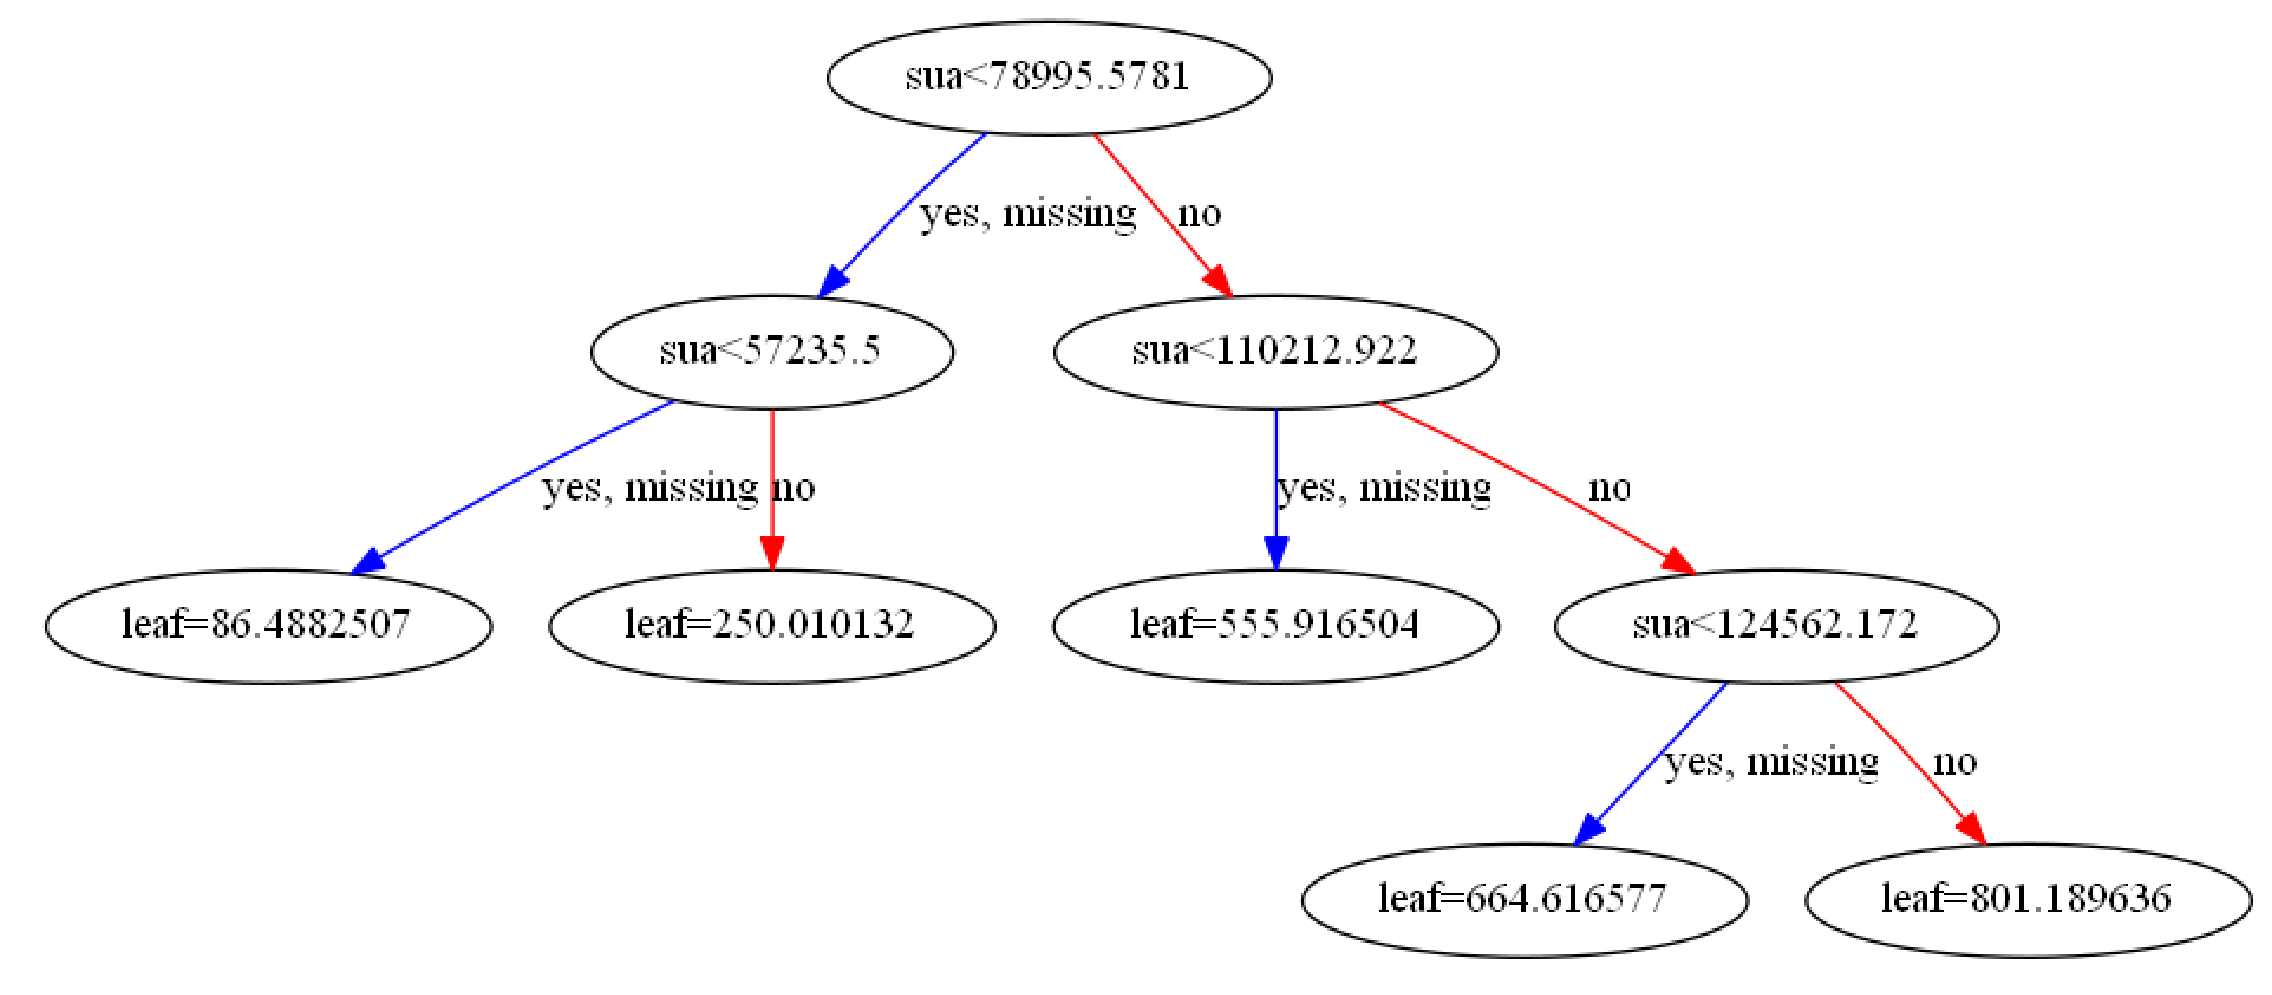

In [3397]:
import matplotlib.pyplot as plt

import os; os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dtrn = xgb.DMatrix(X_var,Y_var)

xg_reg = xgb.train(params = prm, dtrain = dtrn, num_boost_round=12)

xgb.plot_tree(xg_reg)
plt.rcParams['figure.figsize'] = [40, 40]
plt.show()

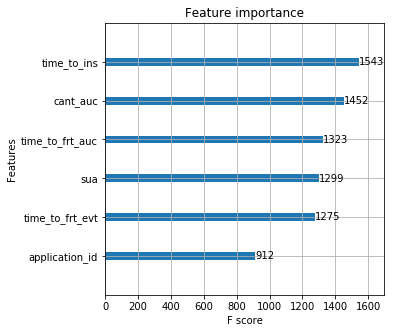

In [3395]:
import matplotlib.pyplot as plt
xgb.plot_importance(fit)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()